In [4]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from rdkit.Chem import Draw
from fragmenstein import Victor, Igor
import sys
import pandas as pd
from itertools import chain
import ast
import subprocess
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem import rdFMCS
from IPython.display import display
import xml.etree.ElementTree as ET
import os
import subprocess

# FULL PIPELINE FOR 5 BASE COMPOUNDS.
I'll work off five base compounds proposed in the first submission for EVD683C.

1. C2(Cl)=CC=C(CNC(=O)NC1=CC(C(N)=O)=CC=C1)C=C2. Linker of x1140, x0771. Ferla. Confidence 4 (out of 5)
2. C1CNC(=O)C1NCC2=NC(C)=CS2. x1594 Inspiration. Ferla. Confidence 4 (out of 5)
3. Cc1cc2oc(=O)c3c(c2c2c1C(=O)CC(c1ccc4c(c1)OCO4)O2)CCCC3. Inspiration from x0771_0A x1140_0A. Wills Fragment Network. No confidence label.
4. O(C3=CC(CNC(=O)NCC2=CC=C1OCOC1=C2)=CC=C3O)C. Inspiration from x1140 x1604. Ferla. Confidence 3 (out of 5).
5. O=C(C)CCC(=O)C5CCC(C1=CCC2=C1CC3(C2)N=NC4=C3C=CC=C4)NC5. Inspiration from x0147, x1052. Tomlinson. Confidence 4 (out of 5).

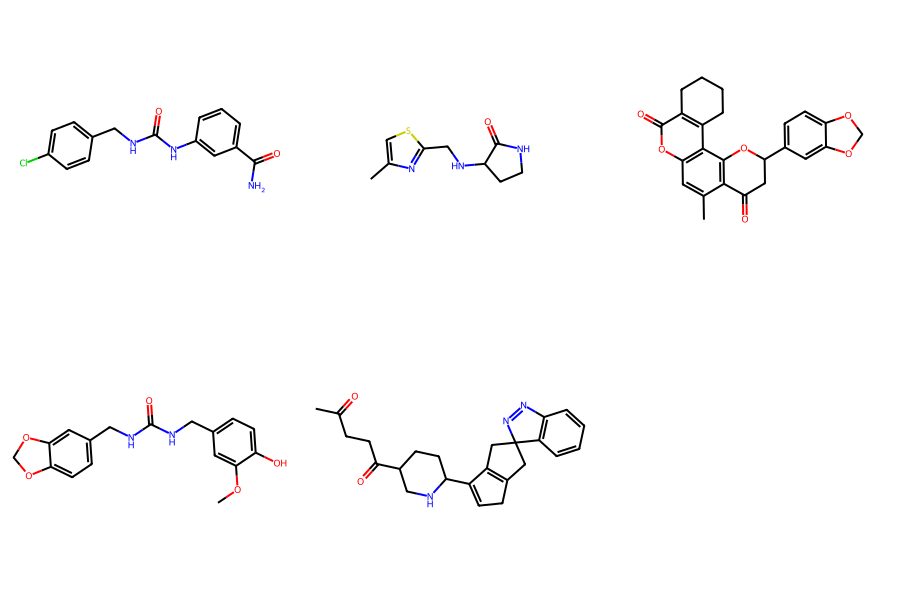

In [188]:
# The five compounds
mols = [Chem.MolFromSmiles('C2(Cl)=CC=C(CNC(=O)NC1=CC(C(N)=O)=CC=C1)C=C2'),
        Chem.MolFromSmiles('C1CNC(=O)C1NCC2=NC(C)=CS2'),
        Chem.MolFromSmiles('Cc1cc2oc(=O)c3c(c2c2c1C(=O)CC(c1ccc4c(c1)OCO4)O2)CCCC3'),
        Chem.MolFromSmiles('O(C3=CC(CNC(=O)NCC2=CC=C1OCOC1=C2)=CC=C3O)C'),
        Chem.MolFromSmiles('O=C(C)CCC(=O)C5CCC(C1=CCC2=C1CC3(C2)N=NC4=C3C=CC=C4)NC5')]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300,300))

### Run each compound through Manifold. Get all reaction pathways. Order by number of steps.

# DO NOT RUN THIS BLOCK

In [ ]:
# Make csv of these smiles
smiles = [Chem.MolToSmiles(x) for x in mols]
smiles
df = pd.DataFrame(smiles, columns=['smiles'])
df.to_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4/base5smiles.csv', index=False)

In [ ]:
# Run through retrosynthesis Manifold
%run /Users/kate_fieseler/PycharmProjects/postera/postera_retrosynthesis.py /Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4/base5smiles.csv 0

# Running from the notebook for some reason doesn't save in cache. But running from the terminal does save in cache.

## Output from Manifold
For the 5 molecules, 3 of them have pathways that the robot can do. The 1,2, and 4th. Funnily enough those are all Matteo's compounds. Unfortunately they are all pretty similar, but I'll look at them anways. If I have enough time, I'll look at all the compounds in the first order...

### Getting the single step reactions and reactants

In [ ]:
# create easy to read csv of all compounds with single step reactions
# input: cache_path, csv of smiles path
# output: csv of specified compound, with single step reactions and reactants

command = [
    "python",
    "/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py",
    "-t",
    "/Users/kate_fieseler/PycharmProjects/postera/cache_output_super/cache_postera_retrosynthesisscaffold_restrict_diamond-mcule_ultimate-enamine_real-wuxi_bb_screening-sigma-generic-molport-emolecules-mcule-wuxi_galaxi-enamine_bb-enamine_made.sqlite",
    "-r",
    "/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4",
    "-s",
    "/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4/base5smiles.csv",
    "-n",
    "1"
]
subprocess.run(command)

# BLOCK ENDED: YOU CAN RUN THINGS NOW

In [185]:
# Compounds with single step reactions
df = pd.read_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4/base5smiles_routes_1_step.csv', index_col=False)
df

,SMILES,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock
0,NC(=O)c1cccc(NC(=O)NCc2ccc(Cl)cc2)c1,1,['Formation of urea from two amines'],"[('NCc1ccc(Cl)cc1', 'NC(=O)c1cccc(N)c1')]","['NC(=O)c1cccc(NC(=O)NCc2ccc(Cl)cc2)c1', 'NC(=...","['mcule', 'enamine_real', 'enamine_bb', 'gener..."
1,NC(=O)c1cccc(NC(=O)NCc2ccc(Cl)cc2)c1,1,['Amidation'],"[('O=C(NCc1ccc(Cl)cc1)Nc1cccc(C(=O)O)c1', 'N')]","['O=C(NCc1ccc(Cl)cc1)Nc1cccc(C(=O)O)c1', 'N', ...","['mcule', 'generic', 'sigma', 'molport', 'mcul..."
2,Cc1csc(CNC2CCNC2=O)n1,1,['Reductive amination'],"[('NC1CCNC1=O', 'Cc1csc(C=O)n1')]","['Cc1csc(CNC2CCNC2=O)n1', 'NC1CCNC1=O', 'Cc1cs...","['enamine_real', 'enamine_made', 'enamine_made..."
3,COc1cc(CNC(=O)NCc2ccc3c(c2)OCO3)ccc1O,1,['Formation of urea from two amines'],"[('NCc1ccc2c(c1)OCO2', 'COc1cc(CN)ccc1O')]","['COc1cc(CN)ccc1O', 'NCc1ccc2c(c1)OCO2', 'COc1...","['sigma', 'enamine_bb', 'emolecules', 'generic..."
4,COc1cc(CNC(=O)NCc2ccc3c(c2)OCO3)ccc1O,1,['Buchwald-Hartwig (thio)etherification'],"[('O=C(NCc1ccc(O)c(Br)c1)NCc1ccc2c(c1)OCO2', '...","['O=C(NCc1ccc(O)c(Br)c1)NCc1ccc2c(c1)OCO2', 'C...","['enamine_real', 'enamine_real', 'mcule', 'emo..."


In [186]:
# Show compounds with reactants and labeled reactions
single_step = {}
for i, row in df.iterrows():
    reactants = ast.literal_eval(row['reactants'])[0]
    if row['SMILES'] in single_step:
        existing_value = single_step[row['SMILES']]
        single_step[row['SMILES']] = [single_step[row['SMILES']], reactants]
    else:
        single_step[row['SMILES']] = reactants
single_step

{'NC(=O)c1cccc(NC(=O)NCc2ccc(Cl)cc2)c1': [('NCc1ccc(Cl)cc1',
   'NC(=O)c1cccc(N)c1'),
  ('O=C(NCc1ccc(Cl)cc1)Nc1cccc(C(=O)O)c1', 'N')],
 'Cc1csc(CNC2CCNC2=O)n1': ('NC1CCNC1=O', 'Cc1csc(C=O)n1'),
 'COc1cc(CNC(=O)NCc2ccc3c(c2)OCO3)ccc1O': [('NCc1ccc2c(c1)OCO2',
   'COc1cc(CN)ccc1O'),
  ('O=C(NCc1ccc(O)c(Br)c1)NCc1ccc2c(c1)OCO2', 'CO')]}

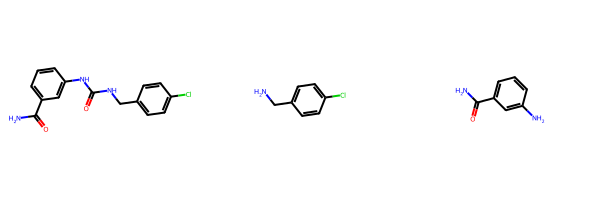

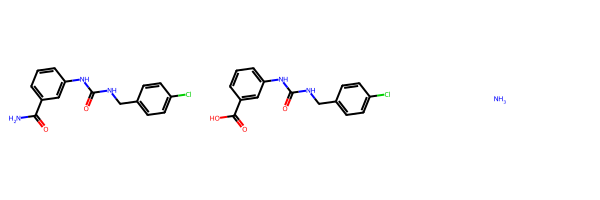

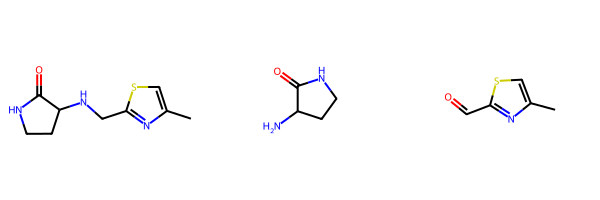

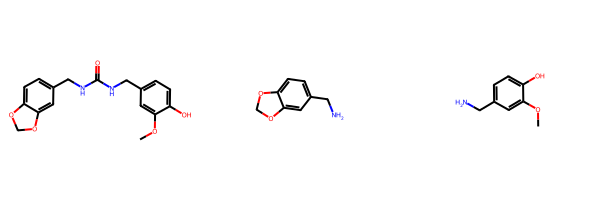

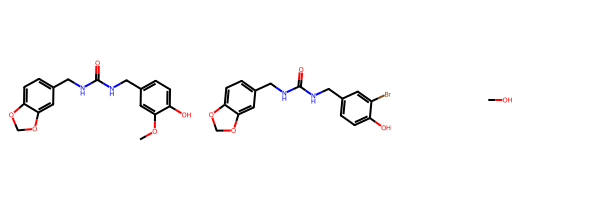

In [187]:
# Visualizing output compound and reactants
def visualize_compounds_and_reactants(data_dict):
    for compound, reactants in data_dict.items():
        # If reactants are not already in a list, wrap them in a list
        if isinstance(reactants, tuple):
            reactants = [reactants]

        for reactant_pair in reactants:
            # Convert the SMILES strings to molecular objects
            mol_compound = Chem.MolFromSmiles(compound)
            mol_reactants = [Chem.MolFromSmiles(smiles) for smiles in reactant_pair]

            # Display the compound and its reactants
            mols_to_draw = [mol_compound] + mol_reactants
            img = Draw.MolsToGridImage(mols_to_draw, molsPerRow=3, subImgSize=(200, 200))
            display(img)

visualize_compounds_and_reactants(single_step)

## Compound Commentary

Clearly, only 3 compounds were found to have single step routes. Luckily, all of them have large enough reactants to be able to elaborate off of and not changing just a single functional group.

Now, find all the elaborated reactants via a superstructure search with Manifold. OR a substructure search with Arthor.

TODO: Superstructure search with Arthor.

In [ ]:
# MAKING INPUT CSV FOR wholeMoleculePipeline.py
# Run through wholeMoleculePipeline where the superstructure search is implemented.
# Convert the string data into a dataframe

def process_dataframe(df):
    # Extract and process the Reaction_name
    df['Reaction_name'] = df['rxn_order_first_to_last'].apply(lambda x: ast.literal_eval(x)[0])

    # Extract and process the Reactants
    df['Reactants'] = df['reactants'].apply(lambda x: ast.literal_eval(x)[0])

    # Extract the desired columns
    new_df = df[['SMILES', 'Reaction_name', 'Reactants']]

    return new_df

new_df = process_dataframe(df)
new_df.to_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4/3routes'
          '.csv', index=False)

## RUN THROUGH wholeMoleculePipeline.py VIA TERMINAL

Now, analyze the output

# DO NOT RUN THIS BLOCK
(Nothing bad, it'll just take awhile) All it's doing is to add the product mw column to analog csv

In [ ]:
# wholeMoleculePipeline output is a csv with the elaborated reactants, in this example Reductive_amination_212652_analogs.csv
# Take in csv with smiles and calculate product molecular weight to help prioritize... Not a great prioritization method, but it's something.

df = pd.read_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/Reductive_amination_212652_analogs.csv')
mw = []
df['product_mw'] = None
for i, row in df.iterrows():
    products = ast.literal_eval(row['product_smi'])
    if len(products) >= 1:
        product_mw = Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(products[0]))
        mw.append(product_mw)
        df.iloc[i, df.columns.get_loc('product_mw')] = product_mw
    else:
        print(i)
mw
df.to_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/Reductive_amination_212652_analogs.csv', index=False)

# BLOCK ENDED: YOU CAN RUN THINGS NOW

## WHICH COMPOUNDS TO PICK?

You can to prioritize compouds that differ to the base compound by as little as possible.

After talking with Warren on August 7, what I need to first do is implement a filter that finds compounds that differ as little as possible.

Idea 1: Get MCS between base compound and elaborated. Then find the number of atoms difference.

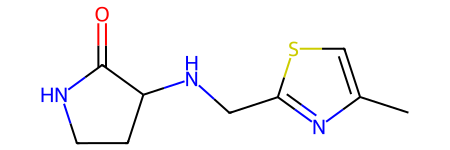

In [141]:
# IDEA 1: Get MCS between base compound and elaborated. Then find the number of atoms difference.
# Add column to csv with number of atoms difference
base = Chem.MolFromSmiles('Cc1csc(CNC2CCNC2=O)n1')
base

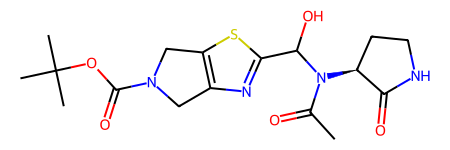

In [144]:
# Random elaborated reactant
elaborated = ast.literal_eval(df['product_smi'].sample().iloc[0]) # .sample() returns a Series with 1 item, and iloc[0] returns the first item in the Series
if type(elaborated) is list:
    elaborated = elaborated[0]
e_mol = Chem.MolFromSmiles(elaborated)
e_mol

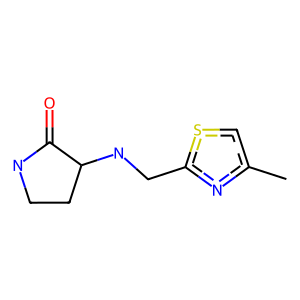

In [145]:
# Get MCS between base and elaborated
mcs = rdFMCS.FindMCS([base, e_mol])
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
img = Draw.MolToImage(mcs_mol)
display(img)

In [146]:
# Is the MCS the base compound?
def is_mcs_same_as_mol(mol1, mol2, compare_mol):
    # Find the MCS of mol1 and mol2
    mcs_result = rdFMCS.FindMCS([mol1, mol2])

    # Create an RDKit molecule object from the MCS's SMARTS string
    mcs_mol = Chem.MolFromSmarts(mcs_result.smartsString)

    # Check if the MCS is the same as the compare_mol using a substructure match
    return compare_mol.HasSubstructMatch(mcs_mol) and mcs_mol.HasSubstructMatch(compare_mol)
is_mcs_same_as_mol(base, e_mol, base)

True

The MCS between the elaborated compound should usually be the base compound in the query. But that depends on when you're reacting the reactants back together if they are combined at the same atoms as the base compound which is not neccessarily the case. This is where a superstructure search of the original base compound would be useful.

In [148]:
# Get number of atoms difference between MCS and elaborated. Not including hydrogens.
def atom_num_difference(base, e_mol):
    mcs = rdFMCS.FindMCS([base, e_mol])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    mcs_atoms = mcs_mol.GetNumAtoms()
    e_mol_atoms = e_mol.GetNumAtoms()
    difference = e_mol_atoms - mcs_atoms
    return difference

Some elaborated compounds don't have the base compound as the MCS. Lets make a column to the df that denotes this. This will be useful for prioritizing.

In [191]:
# Add column to csv with TRUE or FALSE if MCS is the base compound and number of atoms difference between MCS and elaborated. Not including hydrogens.
base = Chem.MolFromSmiles('Cc1csc(CNC2CCNC2=O)n1')
df['MCS_is_base'] = None
df['MCS_atoms_difference'] = None
for i, row in df.iterrows():
    elaborated = ast.literal_eval(row['product_smi'])
    if not elaborated:
        continue
    if type(elaborated) is list:
        elaborated = elaborated[0]
    e_mol = Chem.MolFromSmiles(elaborated)
    df.iloc[i, df.columns.get_loc('MCS_is_base')] = is_mcs_same_as_mol(base, e_mol, base)
    df.iloc[i, df.columns.get_loc('MCS_atoms_difference')] = atom_num_difference(base, e_mol)
df

KeyError: 'product_smi'

In [8]:
df = pd.read_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/Reductive_amination_136814_MCS_base.csv')
df1 = df.copy()
df1

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_mw,MCS_is_base,MCS_atoms_difference,total_structuralScore
0,0.800013,161.613,O=Cc1nc(CCl)cs1,"[{'catalogName': 'surechembl', 'catalogId': 'S...","(4, 6, 7, 5)",0.505803,101.129,[NH3+][C@H]1CCNC1=O,"[{'catalogName': 'pubchem', 'catalogId': '2830...","(1, 2, 5, 6)","['O=C1NCC[C@@H]1[NH2+]Cc1nc(CCl)cs1', '[NH3+][...",246.046237,True,1,1.305816
1,0.830111,141.195,CC(=O)c1nc(C)cs1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(C)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(C...",NaN,True,1,1.361872
2,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1nc(CN[C@@]23CC2NC3=O)sc1Br', 'Cc1nc(CN2C(...",NaN,True,1,1.074272
3,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.659366,100.121,N[C@@H]1CCNC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)","['Cc1nc(CN[C@@H]2CCNC2=O)sc1Br', 'Cc1nc(CN2CC[...",NaN,True,1,1.201877
4,0.624006,159.235,Cc1csc(C(=O)S)n1,"[{'catalogName': 'pubchem', 'catalogId': '2150...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(S)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(S...",NaN,True,1,1.155767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136809,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.504642,184.283,CC(C)CCNC1(C)CCNC1=O,"[{'catalogName': 'mcule_ultimate', 'catalogId'...","(1, 2, 5, 6)",['CC(C)CCN(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@@...,715.339500,True,35,1.006949
136810,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.525936,196.172,CNC1CCN(CC(F)(F)F)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",['CN1CCc2nc(C(N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C@...,NaN,True,35,1.028243
136811,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.505542,184.239,CCC(C)(C)NC1CC(=O)NC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)",['CCC(C)(C)N(C1CC(=O)NC1=O)C(N[C@@H]1C[C@@H](C...,715.303114,True,35,1.007850
136812,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.587676,184.195,C=CC(=O)N[C@@H]1C[C@H](CO)NC1=O,"[{'catalogName': 'sigma', 'catalogId': '356580...","(1, 2, 5, 6)",['C=CC(=O)N(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@...,NaN,True,35,1.089984


In [7]:
# Filter df to only include rows where MCS is the base compound
df1 = df1[df1['MCS_is_base'] == True]
df1.shape

KeyError: 'MCS_is_base'

Lost 75,838 compounds that do not have MCS as the base compound. I understand that I messed up here because I only considered the first product smiles in the list of product smiles. I should have considered all of them. I'll fix this later / there are so many compounds that I don't think it'll matter.

In [154]:
# Sort df by number of atoms difference between MCS and elaborated
df1 = df1.sort_values(by=['MCS_atoms_difference'])
df1

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_mw,MCS_is_base,MCS_atoms_difference
11836,0.800013,161.613,O=Cc1nc(CCl)cs1,"[{'catalogName': 'surechembl', 'catalogId': 'S...","(4, 6, 7, 5)",0.505803,101.129,[NH3+][C@H]1CCNC1=O,"[{'catalogName': 'pubchem', 'catalogId': '2830...","(1, 2, 5, 6)","['O=C1NCC[C@@H]1[NH2+]Cc1nc(CCl)cs1', '[NH3+][...",246.046237,True,1
53437,0.830111,141.195,CC(=O)c1nc(C)cs1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(C)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(C...",None,True,1
52458,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1nc(CN[C@@]23CC2NC3=O)sc1Br', 'Cc1nc(CN2C(...",None,True,1
173634,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.659366,100.121,N[C@@H]1CCNC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)","['Cc1nc(CN[C@@H]2CCNC2=O)sc1Br', 'Cc1nc(CN2CC[...",None,True,1
52878,0.624006,159.235,Cc1csc(C(=O)S)n1,"[{'catalogName': 'pubchem', 'catalogId': '2150...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(S)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(S...",None,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.504642,184.283,CC(C)CCNC1(C)CCNC1=O,"[{'catalogName': 'mcule_ultimate', 'catalogId'...","(1, 2, 5, 6)",['CC(C)CCN(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@@...,715.3395,True,35
43962,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.525936,196.172,CNC1CCN(CC(F)(F)F)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",['CN1CCc2nc(C(N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C@...,None,True,35
7134,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.505542,184.239,CCC(C)(C)NC1CC(=O)NC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)",['CCC(C)(C)N(C1CC(=O)NC1=O)C(N[C@@H]1C[C@@H](C...,715.303114,True,35
123558,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.587676,184.195,C=CC(=O)N[C@@H]1C[C@H](CO)NC1=O,"[{'catalogName': 'sigma', 'catalogId': '356580...","(1, 2, 5, 6)",['C=CC(=O)N(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@...,None,True,35


In [155]:
# How many compounds have 5 or less atoms difference?
df1[df1['MCS_atoms_difference'] <= 5].shape

(7945, 14)

<Axes: xlabel='MCS_atoms_difference', ylabel='total_structuralScore'>

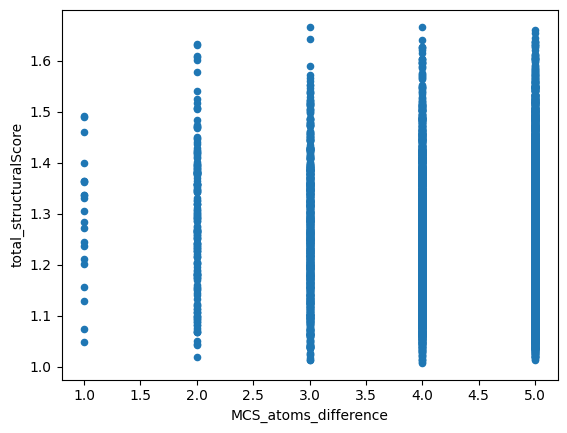

In [165]:
# How does structural score compare with number of atoms difference?
# Add column with total structural score
df1['total_structuralScore'] = None
def compute_total_struct_score(row):
    react1 = row['reactant1_structuralScore']
    react2 = row['reactant2_structuralScore']
    total = react1 + react2
    return total
df1['total_structuralScore'] = (df1.apply(compute_total_struct_score, axis=1))
filtered_df = df1[df1['MCS_atoms_difference'] <= 5]
filtered_df.plot.scatter(x='MCS_atoms_difference', y='total_structuralScore')

In [10]:
# How does mw compare with number of atoms difference?
# Add column with total structural score
df1['product_mw'] = None
def compute_mw(row):
    values = ast.literal_eval(row['product_smi'])
    mol = Chem.MolFromSmiles(values[0])
    return Chem.Descriptors.ExactMolWt(mol)
df1['product_mw'] = (df1.apply(compute_mw, axis=1))
df1

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_mw,MCS_is_base,MCS_atoms_difference,total_structuralScore
0,0.800013,161.613,O=Cc1nc(CCl)cs1,"[{'catalogName': 'surechembl', 'catalogId': 'S...","(4, 6, 7, 5)",0.505803,101.129,[NH3+][C@H]1CCNC1=O,"[{'catalogName': 'pubchem', 'catalogId': '2830...","(1, 2, 5, 6)","['O=C1NCC[C@@H]1[NH2+]Cc1nc(CCl)cs1', '[NH3+][...",246.046237,True,1,1.305816
1,0.830111,141.195,CC(=O)c1nc(C)cs1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(C)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(C...",223.077933,True,1,1.361872
2,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1nc(CN[C@@]23CC2NC3=O)sc1Br', 'Cc1nc(CN2C(...",286.972795,True,1,1.074272
3,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.659366,100.121,N[C@@H]1CCNC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)","['Cc1nc(CN[C@@H]2CCNC2=O)sc1Br', 'Cc1nc(CN2CC[...",288.988445,True,1,1.201877
4,0.624006,159.235,Cc1csc(C(=O)S)n1,"[{'catalogName': 'pubchem', 'catalogId': '2150...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(S)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(S...",241.034354,True,1,1.155767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136809,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.504642,184.283,CC(C)CCNC1(C)CCNC1=O,"[{'catalogName': 'mcule_ultimate', 'catalogId'...","(1, 2, 5, 6)",['CC(C)CCN(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@@...,715.339500,True,35,1.006949
136810,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.525936,196.172,CNC1CCN(CC(F)(F)F)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",['CN1CCc2nc(C(N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C@...,727.264284,True,35,1.028243
136811,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.505542,184.239,CCC(C)(C)NC1CC(=O)NC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)",['CCC(C)(C)N(C1CC(=O)NC1=O)C(N[C@@H]1C[C@@H](C...,715.303114,True,35,1.007850
136812,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.587676,184.195,C=CC(=O)N[C@@H]1C[C@H](CO)NC1=O,"[{'catalogName': 'sigma', 'catalogId': '356580...","(1, 2, 5, 6)",['C=CC(=O)N(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@...,715.266729,True,35,1.089984


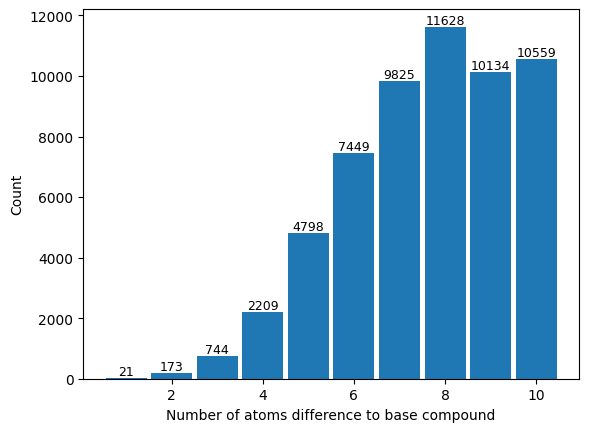

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the unique values and their counts
unique_values, counts = np.unique(df1['MCS_atoms_difference'], return_counts=True)
counts = counts.tolist()
unique_values = unique_values.tolist()

# Plot bar graph
bars = plt.bar(unique_values[:10], counts[:10], width=0.9)
plt.xlabel('Number of atoms difference to base compound')
plt.ylabel('Count')

# # Annotate bars with their counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

<Axes: xlabel='MCS_atoms_difference', ylabel='total_structuralScore'>

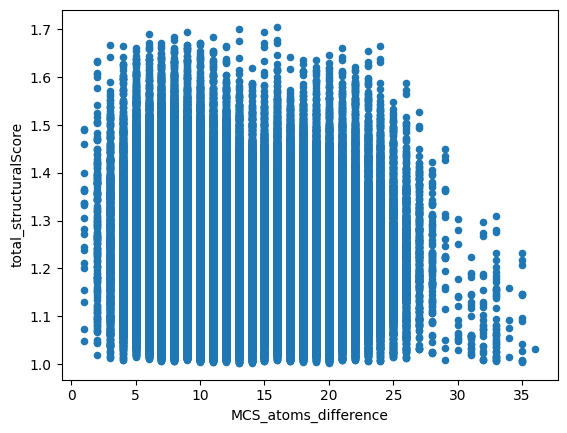

In [166]:
df1.plot.scatter(x='MCS_atoms_difference', y='total_structuralScore') 

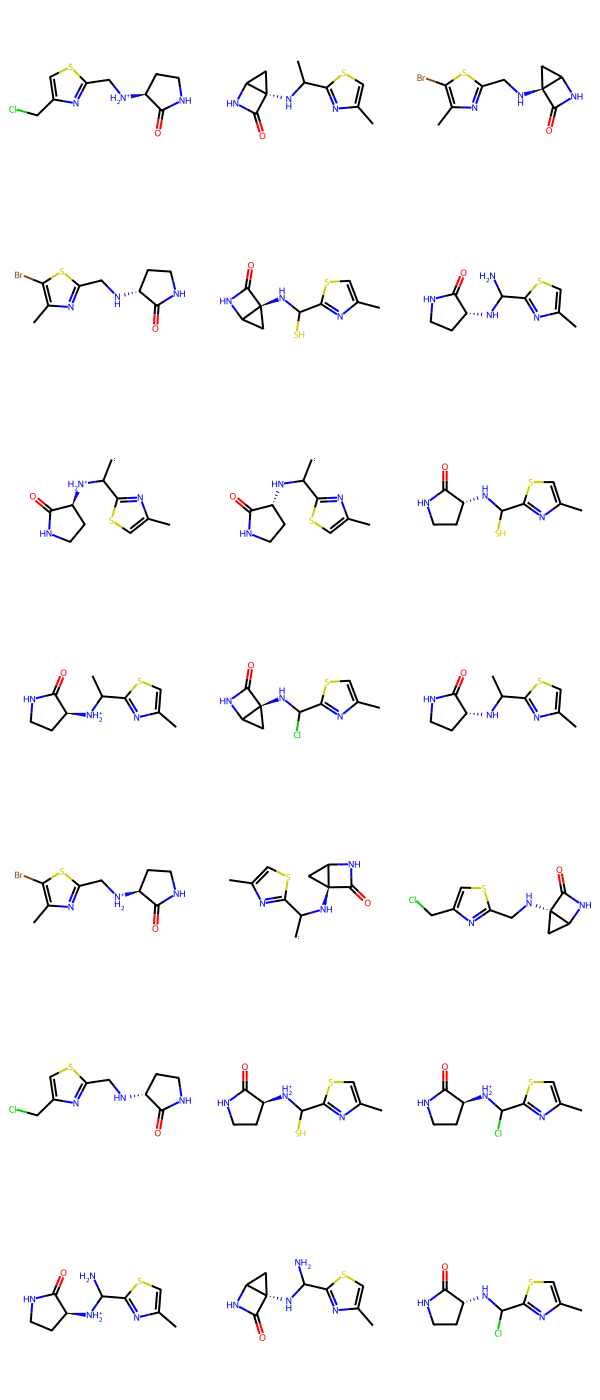

In [189]:
# Let's look at structures that have an MCS atom difference of 1
def get_mols(row):
    smiles = ast.literal_eval(row['product_smi'])
    smiles = smiles[0]
    mol = Chem.MolFromSmiles(smiles)
    return mol
df_1_atom = df1[df1['MCS_atoms_difference'] == 1]
mols = df_1_atom.apply(get_mols, axis=1)
Draw.MolsToGridImage(mols)

In [183]:
len(df1[df1['MCS_atoms_difference'] <= 5])

7945

In [193]:
# Save full df
df1.to_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/Reductive_amination_136814_MCS_base.csv', index=False)

In [192]:
df1

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_mw,MCS_is_base,MCS_atoms_difference,total_structuralScore
11836,0.800013,161.613,O=Cc1nc(CCl)cs1,"[{'catalogName': 'surechembl', 'catalogId': 'S...","(4, 6, 7, 5)",0.505803,101.129,[NH3+][C@H]1CCNC1=O,"[{'catalogName': 'pubchem', 'catalogId': '2830...","(1, 2, 5, 6)","['O=C1NCC[C@@H]1[NH2+]Cc1nc(CCl)cs1', '[NH3+][...",246.046237,True,1,1.305816
53437,0.830111,141.195,CC(=O)c1nc(C)cs1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(C)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(C...",None,True,1,1.361872
52458,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1nc(CN[C@@]23CC2NC3=O)sc1Br', 'Cc1nc(CN2C(...",None,True,1,1.074272
173634,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.659366,100.121,N[C@@H]1CCNC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)","['Cc1nc(CN[C@@H]2CCNC2=O)sc1Br', 'Cc1nc(CN2CC[...",None,True,1,1.201877
52878,0.624006,159.235,Cc1csc(C(=O)S)n1,"[{'catalogName': 'pubchem', 'catalogId': '2150...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)","['Cc1csc(C(S)N[C@@]23CC2NC3=O)n1', 'Cc1csc(C(S...",None,True,1,1.155767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.504642,184.283,CC(C)CCNC1(C)CCNC1=O,"[{'catalogName': 'mcule_ultimate', 'catalogId'...","(1, 2, 5, 6)",['CC(C)CCN(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@@...,715.3395,True,35,1.006949
43962,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.525936,196.172,CNC1CCN(CC(F)(F)F)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",['CN1CCc2nc(C(N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C@...,None,True,35,1.028243
7134,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.505542,184.239,CCC(C)(C)NC1CC(=O)NC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)",['CCC(C)(C)N(C1CC(=O)NC1=O)C(N[C@@H]1C[C@@H](C...,715.303114,True,35,1.007850
123558,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.587676,184.195,C=CC(=O)N[C@@H]1C[C@H](CO)NC1=O,"[{'catalogName': 'sigma', 'catalogId': '356580...","(1, 2, 5, 6)",['C=CC(=O)N(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@...,None,True,35,1.089984


## QUANTIFYING PLACEMENTS

Input: Placed structures
Output: CSV with
- SMILES of compound
- number of atoms not in MCS to base compound
- Delta delta G value from Fragmenstein
- Interactions calculated with PLIP

I had lots of trouble installing PLIP (error with not finding the openbabel library, so I'm just using Docker) Hopefully using Docker is easy enough?

Okay I will have to run install

In [211]:
# Read in xml output from PLIP and return dictionary similar to Matteo's PLIP output
#``Dict[Tuple[str, str, int], int]``, where the key is interaction type, residue 3-letter name, residue index and the value is the count of interactions.
import xml.etree.ElementTree as ET
from typing import Dict, Tuple

def generate_plip_dict(report_file, lig_ident, binding_site_id) -> Dict[Tuple[str, str, int], int]:
    # Initialize the interaction dictionary
    interaction_dict = {}

    tree = ET.parse(report_file)
    root = tree.getroot()

    # Iterate through each binding site with id=3
    for binding_site in root.findall('bindingsite'):
        if binding_site.get('id') == str(binding_site_id):
            nest = binding_site.find('identifiers')
            lig_code = nest.find('hetid')

            if str(lig_code.text) == str(lig_ident):
                # Extracting interactions
                interactions_section = binding_site.find('interactions')

                for interaction_type in interactions_section:
                    for interaction in interaction_type:
                        resnr = interaction.find('resnr').text # residue number
                        restype = interaction.find('restype').text # 3-letter code

                        key = (interaction_type.tag, restype, int(resnr))
                        if key in interaction_dict:
                            interaction_dict[key] += 1
                        else:
                            interaction_dict[key] = 1

    return interaction_dict

# Example usage with x0771 output
path = '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/plip_scores/D68EV3CPROA-x0771_0A/results1/report.xml'
result = generate_plip_dict(path, 'LIG', 3)
print(result)

{('hydrogen_bonds', 'THR', 142): 1, ('water_bridges', 'ASN', 165): 2}


In [224]:
# Now run the base compound through PLIP, do you need to solvate it?
# run docker with -y to visualize
!docker run -v /Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/base_compound_placed:/results -w /results -u $(id -u ${USER}):$(id -g ${USER}) pharmai/plip:latest -f base_matteo_submit_in_apo.pdb -x -y
# Only 1 hydrogen bond in catalytic site

2023-08-09 21:58:14,593 [INFO] [plipcmd.py:124] plip: Protein-Ligand Interaction Profiler (PLIP) 2.2.2
2023-08-09 21:58:14,597 [INFO] [plipcmd.py:125] plip: brought to you by: PharmAI GmbH (2020-2021) - www.pharm.ai - hello@pharm.ai
2023-08-09 21:58:14,597 [INFO] [plipcmd.py:126] plip: please cite: Adasme,M. et al. PLIP 2021: expanding the scope of the protein-ligand interaction profiler to DNA and RNA. Nucl. Acids Res. (05 May 2021), gkab294. doi: 10.1093/nar/gkab294
2023-08-09 21:58:14,598 [INFO] [plipcmd.py:49] plip: starting analysis of base_matteo_submit_in_apo.pdb
2023-08-09 21:58:14,721 [INFO] [preparation.py:1351] plip.structure.preparation: 1449 lines automatically fixed in PDB input file
2023-08-09 21:58:16,743 [INFO] [preparation.py:1372] plip.structure.preparation: PDB structure successfully read
2023-08-09 21:58:16,964 [INFO] [preparation.py:1399] plip.structure.preparation: protonated structure written to ./base_matteo_submit_in_apo_protonated.pdb
2023-08-09 21:58:16,994 

In [227]:
# You have to run each complex through the PLIP Docker container
# Example:
# !docker run -v /path/to/your/local/directory:/results -w /results -u $(id -u ${USER}):$(id -g ${USER}) pharmai/plip:latest -i /data/myfile.pdb -yv
# Run PLIP via Docker. This is an example to visualize the interactions of the file "myfile.pdb"
# Parse the output of PLIP and return a dictionary of interactions
path = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/base_compound_placed/report.xml'
generate_plip_dict(path, 'UNK', 1)

{('hydrogen_bonds', 'GLY', 164): 1}

The base compound is not making the same interactions as the fragment. Could be due to placement but yep as is no. Lets look at the base compound that I placed with just the vanilla version of Fragmenstein.

In [228]:
# Run PLIP for the placement that I performed
!docker run -v /Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/base_compound_placed/base_my_placement_NOT_MATTEO:/results -w /results -u $(id -u ${USER}):$(id -g ${USER}) pharmai/plip:latest -f base1.holo_minimised.pdb -x -y

2023-08-09 22:06:17,437 [INFO] [plipcmd.py:124] plip: Protein-Ligand Interaction Profiler (PLIP) 2.2.2
2023-08-09 22:06:17,440 [INFO] [plipcmd.py:125] plip: brought to you by: PharmAI GmbH (2020-2021) - www.pharm.ai - hello@pharm.ai
2023-08-09 22:06:17,440 [INFO] [plipcmd.py:126] plip: please cite: Adasme,M. et al. PLIP 2021: expanding the scope of the protein-ligand interaction profiler to DNA and RNA. Nucl. Acids Res. (05 May 2021), gkab294. doi: 10.1093/nar/gkab294
2023-08-09 22:06:17,441 [INFO] [plipcmd.py:49] plip: starting analysis of base1.holo_minimised.pdb
2023-08-09 22:06:17,659 [INFO] [preparation.py:1351] plip.structure.preparation: 367 lines automatically fixed in PDB input file
2023-08-09 22:06:18,155 [INFO] [preparation.py:1372] plip.structure.preparation: PDB structure successfully read
2023-08-09 22:06:18,446 [INFO] [preparation.py:1399] plip.structure.preparation: protonated structure written to ./base1_protonated.pdb
2023-08-09 22:06:18,507 [INFO] [preparation.py:142

In [230]:
path = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/base_compound_placed/base_my_placement_NOT_MATTEO/report.xml'
generate_plip_dict(path, 'LIG', 1)

{('hydrophobic_interactions', 'LEU', 127): 1,
 ('hydrogen_bonds', 'GLY', 145): 1,
 ('pi_stacks', 'HIS', 40): 1}

In [232]:
# Run PLIP for all the placements I performed
BASE_DIR = "/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/"

def run_plip_analysis(directory):
    pdb_file = f"Reductive-amination-analog-1-atom-MCS-diff{directory.split('diff')[-1]}.holo_minimised.pdb"
    command = [
        'docker', 'run',
        '-v', f"//{BASE_DIR}/{directory}:/results",
        '-w', '/results',
        '-u', f"$(id -u {os.getlogin()}):$(id -g {os.getlogin()})",
        'pharmai/plip:latest',
        '-f', pdb_file,
        '-x', '-y'
    ]

    result = subprocess.run(command, capture_output=True, text=True)
    print(result.stdout)
    if result.stderr:
        print(f"Error in {directory}:", result.stderr)

In [233]:
directories = [
    f"Reductive-amination-analog-1-atom-MCS-diff{i}" for i in range(1, 22)
]

for directory in directories:
    run_plip_analysis(directory)


Error in Reductive-amination-analog-1-atom-MCS-diff1: WARNING: The requested image's platform (linux/amd64) does not match the detected host platform (linux/arm64/v8) and no specific platform was requested
docker: Error response from daemon: unable to find user $(id -u root): no matching entries in passwd file.


Error in Reductive-amination-analog-1-atom-MCS-diff2: WARNING: The requested image's platform (linux/amd64) does not match the detected host platform (linux/arm64/v8) and no specific platform was requested
docker: Error response from daemon: unable to find user $(id -u root): no matching entries in passwd file.
time="2023-08-09T23:21:20+01:00" level=error msg="error waiting for container: "


Error in Reductive-amination-analog-1-atom-MCS-diff3: WARNING: The requested image's platform (linux/amd64) does not match the detected host platform (linux/arm64/v8) and no specific platform was requested
docker: Error response from daemon: unable to find user $(id -u root): no matching

In [244]:
import os
import subprocess

BASE_DIR = "/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/21_1_atom_difference_placed/"

def run_plip_analysis(directory):
    pdb_file = f"Reductive-amination-analog-1-atom-MCS-diff{directory.split('diff')[-1]}.holo_minimised.pdb"
    pdb_path = os.path.join(BASE_DIR, directory, pdb_file)
    if not os.path.exists(pdb_path):
        print(f"Error: {pdb_path} does not exist!")
        return

    user_id = os.getuid()
    group_id = os.getgid()

    print(f"{BASE_DIR}/{directory}:/results")

    command = [
        'docker', 'run',
        '-v', f"/{BASE_DIR}/{directory}:/results",
        '-w', '/results',
        '-u', f"{user_id}:{group_id}",
        'pharmai/plip:latest',
        '-f', pdb_file,
        '-x', '-y'
    ]

    result = subprocess.run(command, capture_output=True, text=True)
    print(result.stdout)
    if result.stderr:
        print(f"Error in {directory}:", result.stderr)

directories = [
    f"Reductive-amination-analog-1-atom-MCS-diff{i}" for i in range(1, 22)
]

for directory in directories:
    run_plip_analysis(directory)


/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/21_1_atom_difference_placed//Reductive-amination-analog-1-atom-MCS-diff1:/results

Error in Reductive-amination-analog-1-atom-MCS-diff1: WARNING: The requested image's platform (linux/amd64) does not match the detected host platform (linux/arm64/v8) and no specific platform was requested
2023-08-09 22:32:24,439 [INFO] [plipcmd.py:124] plip: Protein-Ligand Interaction Profiler (PLIP) 2.2.2
2023-08-09 22:32:24,442 [INFO] [plipcmd.py:125] plip: brought to you by: PharmAI GmbH (2020-2021) - www.pharm.ai - hello@pharm.ai
2023-08-09 22:32:24,443 [INFO] [plipcmd.py:126] plip: please cite: Adasme,M. et al. PLIP 2021: expanding the scope of the protein-ligand interaction profiler to DNA and RNA. Nucl. Acids Res. (05 May 2021), gkab294. doi: 10.1093/nar/gkab294
2023-08-09 22:32:24,443 [INFO] [plipcmd.py:49] plip: starting analysis of Red

In [249]:
def run_plip_dict_generation(directory):
    report_path = os.path.join(BASE_DIR, directory, 'report.xml')
    if not os.path.exists(report_path):
        print(f"Error: {report_path} does not exist!")
        return
    return generate_plip_dict(report_path, 'LIG', 1)

for directory in directories:
    output = run_plip_dict_generation(directory)
    print(output)

{}
{}
{('hydrogen_bonds', 'ARG', 143): 1}
{}
{('hydrophobic_interactions', 'ALA', 144): 1, ('hydrogen_bonds', 'THR', 142): 1}
{('hydrogen_bonds', 'THR', 142): 1, ('hydrogen_bonds', 'ARG', 143): 1, ('hydrogen_bonds', 'GLY', 164): 1}
{('hydrogen_bonds', 'ARG', 143): 1}
{}
{('hydrogen_bonds', 'THR', 142): 1, ('hydrogen_bonds', 'GLY', 164): 1}
{('hydrophobic_interactions', 'ALA', 144): 1, ('hydrophobic_interactions', 'GLN', 146): 1}
{('hydrogen_bonds', 'THR', 142): 1}
{('hydrogen_bonds', 'THR', 142): 1, ('hydrogen_bonds', 'ARG', 143): 1}
{}
{('hydrogen_bonds', 'ARG', 143): 1}
{('hydrogen_bonds', 'GLY', 164): 1, ('halogen_bonds', 'GLN', 168): 1}
{('hydrogen_bonds', 'GLY', 164): 1}
{}
{('hydrophobic_interactions', 'THR', 142): 1, ('hydrogen_bonds', 'GLY', 164): 1}
{('hydrophobic_interactions', 'THR', 142): 1, ('hydrogen_bonds', 'HIS', 40): 1}
{('hydrophobic_interactions', 'ALA', 144): 1, ('hydrogen_bonds', 'THR', 142): 1, ('hydrogen_bonds', 'ARG', 143): 1}
{}


Columns:

Total number of interactions
Hydrogen bonds ([3-letter-code_index, 3-letter-code_index, ...]) so length of list is number of interactions, elements can be repeated if making multiple interactions with the same residue
Number of hydrophobic interactions ([3-letter-code_index, 3-letter-code_index, ...])
Number of pi-pi interactions ([3-letter-code_index, 3-letter-code_index, ...])

Number of atoms not on base compound that are making these interactions? Showing that we are making good contributions from additional atoms.

In [252]:
# Edit dataframe product_smi column to single element of first element of list inside that column
def edit_product_smi(df):
    df['product_smi'] = df['product_smi'].apply(lambda x: ast.literal_eval(x)[0])
    return df
df = pd.read_csv('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/EVD683C/data/test_placement_Aug4/elaborated_reactants/Reductive_amination/Reductive_amination_136814_MCS_base.csv')
df = edit_product_smi(df)
df

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_mw,MCS_is_base,MCS_atoms_difference,total_structuralScore
0,0.800013,161.613,O=Cc1nc(CCl)cs1,"[{'catalogName': 'surechembl', 'catalogId': 'S...","(4, 6, 7, 5)",0.505803,101.129,[NH3+][C@H]1CCNC1=O,"[{'catalogName': 'pubchem', 'catalogId': '2830...","(1, 2, 5, 6)",O=C1NCC[C@@H]1[NH2+]Cc1nc(CCl)cs1,246.046237,True,1,1.305816
1,0.830111,141.195,CC(=O)c1nc(C)cs1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)",Cc1csc(C(C)N[C@@]23CC2NC3=O)n1,NaN,True,1,1.361872
2,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)",Cc1nc(CN[C@@]23CC2NC3=O)sc1Br,NaN,True,1,1.074272
3,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.659366,100.121,N[C@@H]1CCNC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)",Cc1nc(CN[C@@H]2CCNC2=O)sc1Br,NaN,True,1,1.201877
4,0.624006,159.235,Cc1csc(C(=O)S)n1,"[{'catalogName': 'pubchem', 'catalogId': '2150...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)",Cc1csc(C(S)N[C@@]23CC2NC3=O)n1,NaN,True,1,1.155767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136809,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.504642,184.283,CC(C)CCNC1(C)CCNC1=O,"[{'catalogName': 'mcule_ultimate', 'catalogId'...","(1, 2, 5, 6)",CC(C)CCN(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@@H]...,715.339500,True,35,1.006949
136810,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.525936,196.172,CNC1CCN(CC(F)(F)F)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",CN1CCc2nc(C(N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C@@H...,NaN,True,35,1.028243
136811,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.505542,184.239,CCC(C)(C)NC1CC(=O)NC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)",CCC(C)(C)N(C1CC(=O)NC1=O)C(N[C@@H]1C[C@@H](C(=...,715.303114,True,35,1.007850
136812,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.587676,184.195,C=CC(=O)N[C@@H]1C[C@H](CO)NC1=O,"[{'catalogName': 'sigma', 'catalogId': '356580...","(1, 2, 5, 6)",C=CC(=O)N(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@@H...,NaN,True,35,1.089984


In [279]:
# Add columns to df with PLIP output
import xml.etree.ElementTree as ET

def plip_info_to_dict(report_file: str, lig_ident: str = 'LIG', binding_site_id: int = 1):
    tree = ET.parse(report_file)
    root = tree.getroot()

    hydrogen_bonds = []
    hydrophobic_interactions = []
    pi_pi_interactions = []
    water_bridges = []
    salt_bridges = []

    # Find the binding site with the specified id
    for binding_site in root.findall('bindingsite'):
        if binding_site.get('id') == str(binding_site_id):
            nest = binding_site.find('identifiers')
            lig_code = nest.find('hetid')
            smiles = nest.find('smiles').text

            if str(lig_code.text) == lig_ident:
                # Extracting interactions
                interactions_section = binding_site.find('interactions')

                for interaction_type in interactions_section:
                    interaction_name = interaction_type.tag

                    for interaction in interaction_type:
                        resnr = interaction.find('resnr').text # residue number
                        restype = interaction.find('restype').text # 3-letter code

                        if interaction_name == 'hydrogen_bonds':
                            hydrogen_bonds.append(f'{resnr}_{restype}')
                        elif interaction_name == 'hydrophobic_interactions':
                            hydrophobic_interactions.append(f'{resnr}_{restype}')
                        elif interaction_name == 'pi_stacks':
                            pi_pi_interactions.append(f'{resnr}_{restype}')
                        elif interaction_name == 'water_bridges':
                            water_bridges.append(f'{resnr}_{restype}')
                        elif interaction_name == 'salt_bridges':
                            salt_bridges.append(f'{resnr}_{restype}')

    return {
        'smiles': smiles,
        'total_interactions': len(hydrogen_bonds) + len(hydrophobic_interactions) + len(pi_pi_interactions),
        'hydrogen_bonds': hydrogen_bonds,
        'hydrophobic_interactions': hydrophobic_interactions,
        'pi_pi_interactions': pi_pi_interactions,
        'water_bridges': water_bridges,
        'salt_bridges': salt_bridges,
        # 'non_base_atoms': non_base_atoms  # Uncomment this if needed
    }


def add_plip_columns(df, xml_path, matched_rows):
    output = plip_info_to_dict(xml_path)

    # Identify the rows in the dataframe where 'product_smi' matches the 'smiles' from the PLIP output
    # matched_rows = df[df['MCS_atoms_difference'] == 1]
    # print(matched_rows)

    # Update only those rows with the PLIP information
    column_index = df.columns.get_loc('total_interactions')
    df.iloc[matched_rows, column_index] = output['total_interactions']
    column_index = df.columns.get_loc('hydrogen_bonds')
    df.iloc[matched_rows, column_index] = str(output['hydrogen_bonds'])
    column_index = df.columns.get_loc('hydrophobic_interactions')
    df.iloc[matched_rows, column_index] = str(output['hydrophobic_interactions'])
    column_index = df.columns.get_loc('pi_pi_interactions')
    df.iloc[matched_rows, column_index] = str(output['pi_pi_interactions'])
    # df.loc[matched_rows, 'non_base_atoms'] = str(output['non_base_atoms'])  # Uncomment if needed
    matched_rows += 1
    return df

matched_rows = 0
for directory in directories:
    report_path = os.path.join(BASE_DIR, directory, 'report.xml')
    add_plip_columns(df, report_path, matched_rows)
    matched_rows += 1

In [280]:
df

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant1_attachmentIdx,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,reactant2_attachmentIdx,product_smi,product_mw,MCS_is_base,MCS_atoms_difference,total_structuralScore,total_interactions,hydrogen_bonds,hydrophobic_interactions,pi_pi_interactions
0,0.800013,161.613,O=Cc1nc(CCl)cs1,"[{'catalogName': 'surechembl', 'catalogId': 'S...","(4, 6, 7, 5)",0.505803,101.129,[NH3+][C@H]1CCNC1=O,"[{'catalogName': 'pubchem', 'catalogId': '2830...","(1, 2, 5, 6)",O=C1NCC[C@@H]1[NH2+]Cc1nc(CCl)cs1,246.046237,True,1,1.305816,0.0,[],[],[]
1,0.830111,141.195,CC(=O)c1nc(C)cs1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)",Cc1csc(C(C)N[C@@]23CC2NC3=O)n1,NaN,True,1,1.361872,0.0,[],[],[]
2,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)",Cc1nc(CN[C@@]23CC2NC3=O)sc1Br,NaN,True,1,1.074272,1.0,['143_ARG'],[],[]
3,0.542511,206.064,Cc1nc(C=O)sc1Br,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(4, 6, 7, 5)",0.659366,100.121,N[C@@H]1CCNC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)",Cc1nc(CN[C@@H]2CCNC2=O)sc1Br,NaN,True,1,1.201877,0.0,[],[],[]
4,0.624006,159.235,Cc1csc(C(=O)S)n1,"[{'catalogName': 'pubchem', 'catalogId': '2150...","(4, 6, 7, 5)",0.531761,98.105,N[C@@]12CC1NC2=O,"[{'catalogName': 'pubchem', 'catalogId': '1531...","(1, 2, 5, 6)",Cc1csc(C(S)N[C@@]23CC2NC3=O)n1,NaN,True,1,1.155767,2.0,['142_THR'],['144_ALA'],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136809,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.504642,184.283,CC(C)CCNC1(C)CCNC1=O,"[{'catalogName': 'mcule_ultimate', 'catalogId'...","(1, 2, 5, 6)",CC(C)CCN(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@@H]...,715.339500,True,35,1.006949,NaN,NaN,NaN,NaN
136810,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.525936,196.172,CNC1CCN(CC(F)(F)F)C1=O,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(1, 2, 5, 6)",CN1CCc2nc(C(N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C@@H...,NaN,True,35,1.028243,NaN,NaN,NaN,NaN
136811,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.505542,184.239,CCC(C)(C)NC1CC(=O)NC1=O,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...","(1, 2, 5, 6)",CCC(C)(C)N(C1CC(=O)NC1=O)C(N[C@@H]1C[C@@H](C(=...,715.303114,True,35,1.007850,NaN,NaN,NaN,NaN
136812,0.502307,548.069,CN1CCc2nc(C(=O)N[C@@H]3C[C@@H](C(=O)N(C)C)CC[C...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...","(4, 6, 7, 5)",0.587676,184.195,C=CC(=O)N[C@@H]1C[C@H](CO)NC1=O,"[{'catalogName': 'sigma', 'catalogId': '356580...","(1, 2, 5, 6)",C=CC(=O)N(C(N[C@@H]1C[C@@H](C(=O)N(C)C)CC[C@@H...,NaN,True,35,1.089984,NaN,NaN,NaN,NaN


/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_56343/1571275172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visual['product_mol'] = df_visual['product_smi'].apply(Chem.MolFromSmiles)


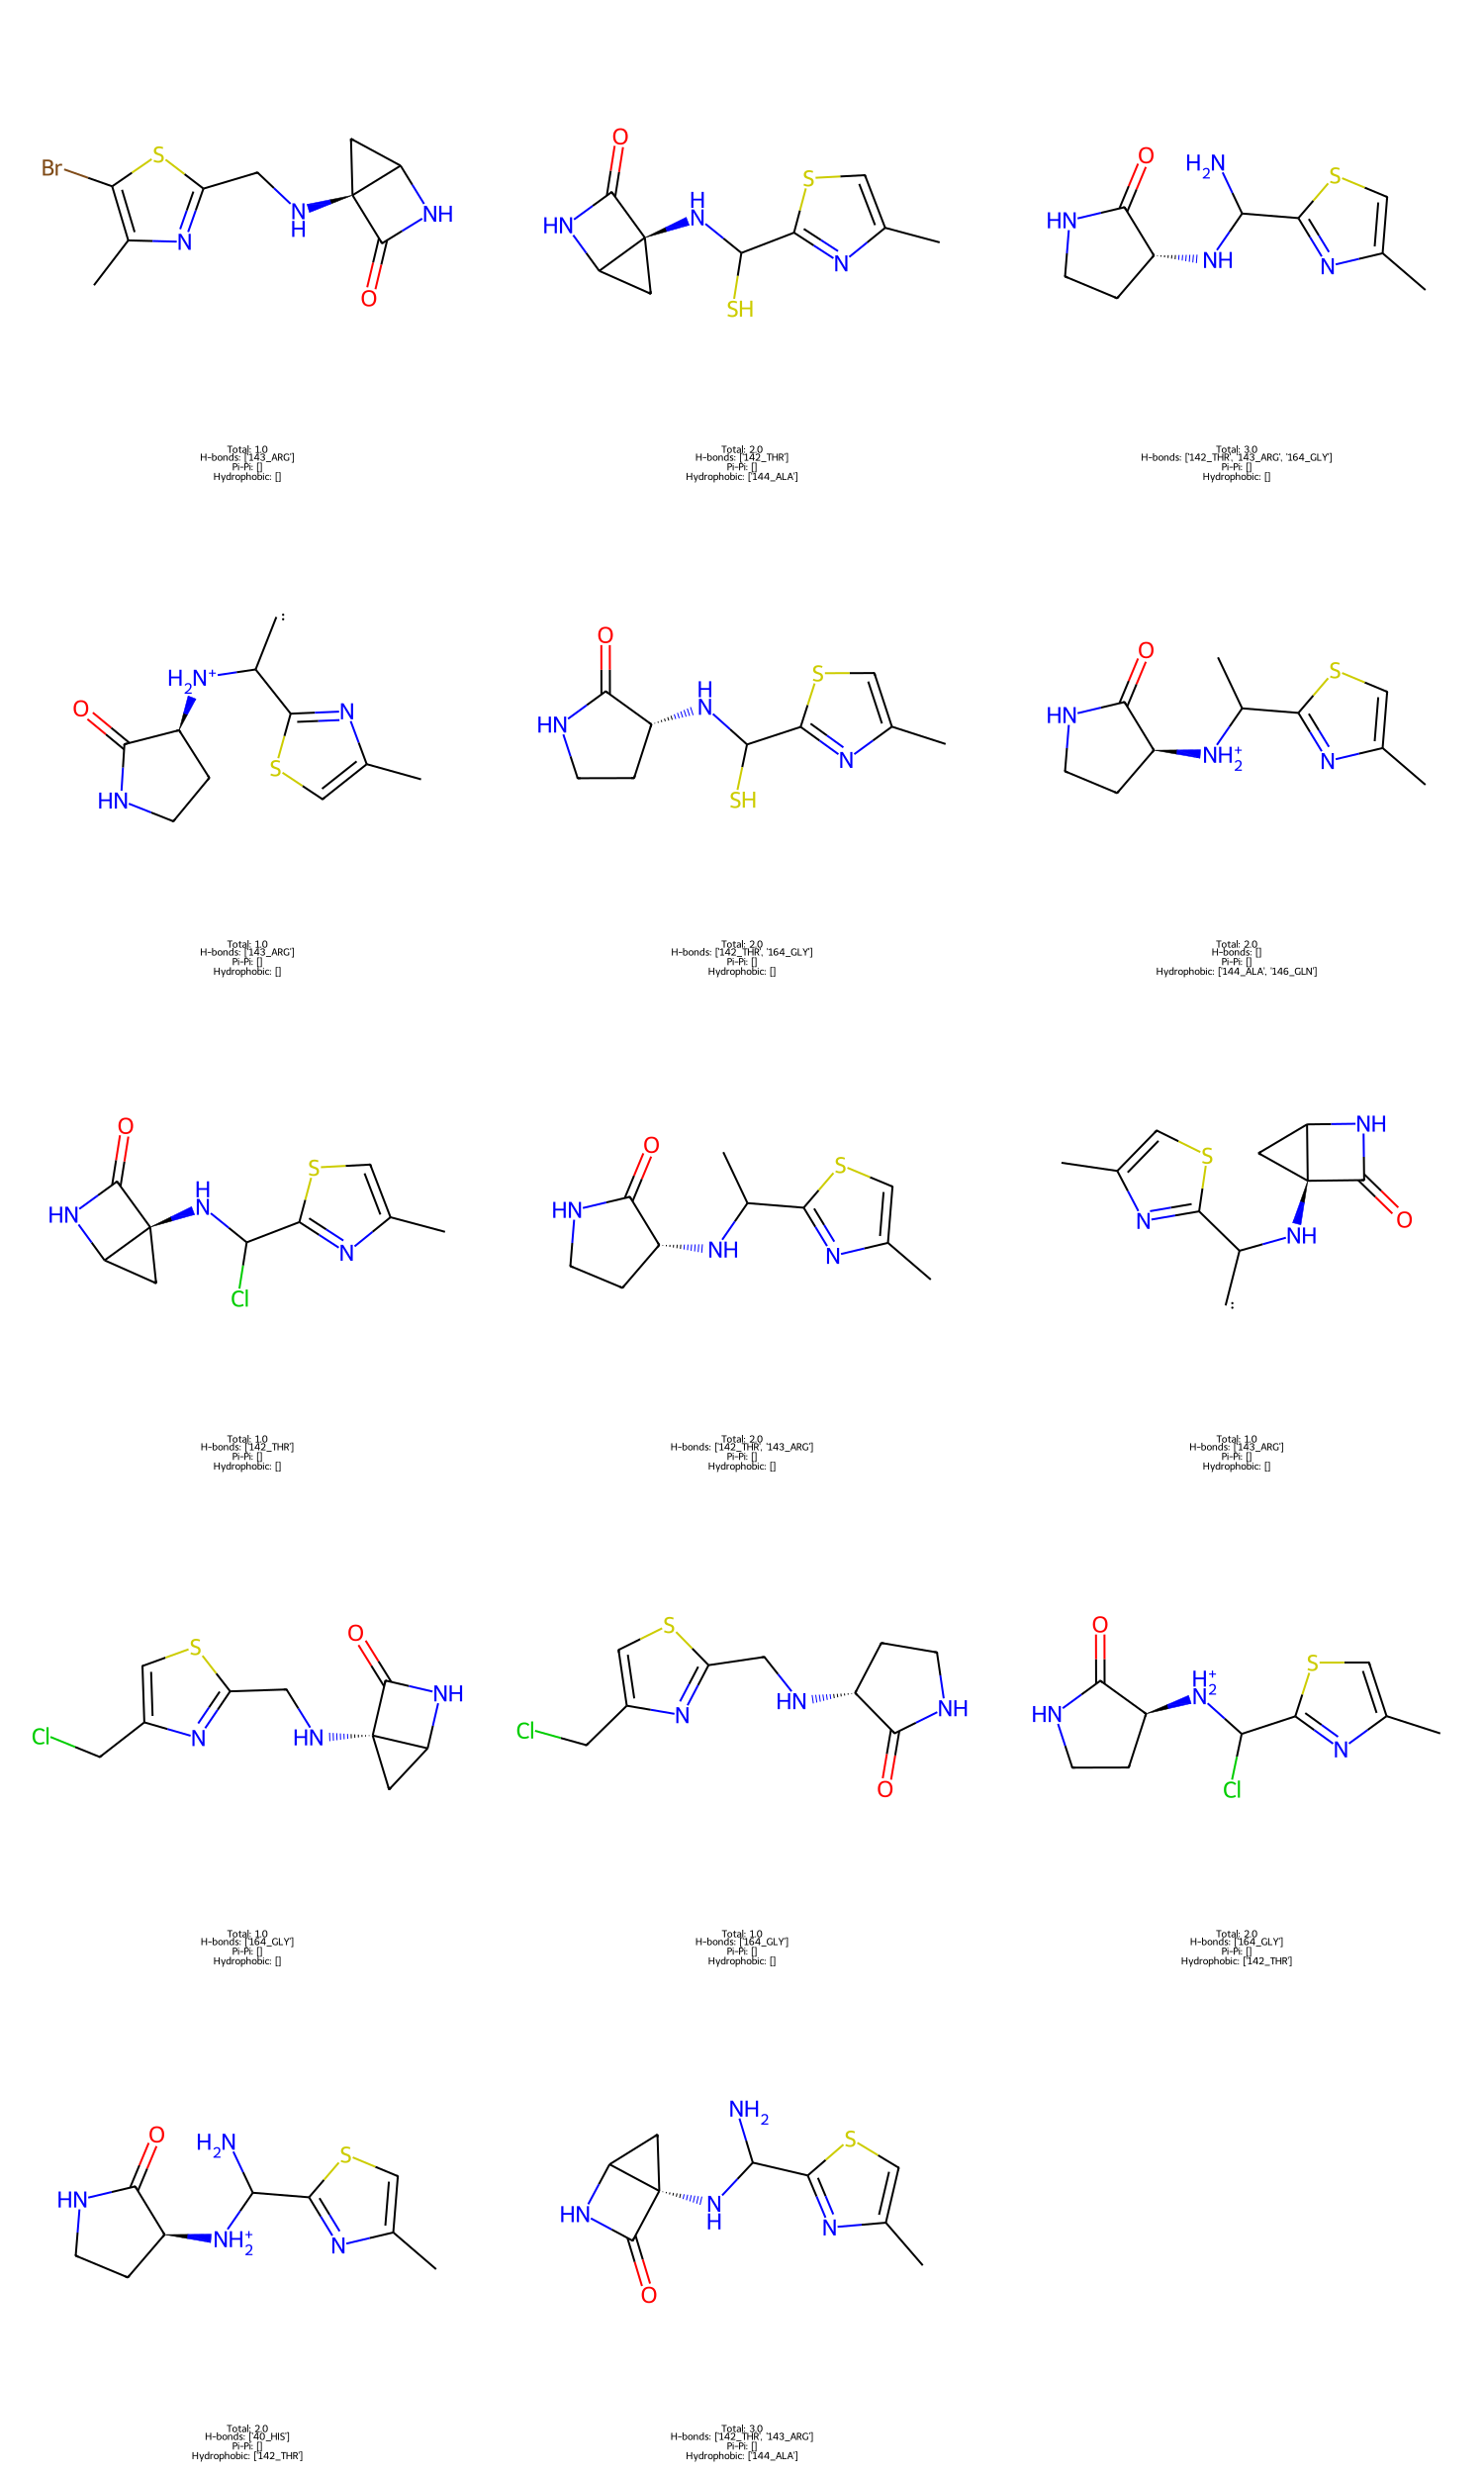

In [294]:
# TODO: Change values of interaction types to be the AAcode_residue_number in a list. Length of list is number of interactions, elements can be repeated if making multiple interactions with the same residue.
# Display the 2D structure of the molecule and the number of interactions
# Convert SMILES strings to RDKit Mol objects
df_visual = df[df['total_interactions']>=1]
df_visual['product_mol'] = df_visual['product_smi'].apply(Chem.MolFromSmiles)

# Generate 2D coordinates for visualization
for mol in df_visual['product_mol']:
    Chem.rdDepictor.Compute2DCoords(mol)

# Construct new legends by combining the values from different columns
legends = df_visual.apply(lambda row: f"Total: {row['total_interactions']}\n"
                               f"H-bonds: {row['hydrogen_bonds']}\n"
                               f"Pi-Pi: {row['pi_pi_interactions']}\n"
                               f"Hydrophobic: {row['hydrophobic_interactions']}",
                   axis=1).tolist()

# Visualize the molecules with total_interactions as labels
img = Draw.MolsToGridImage(df_visual['product_mol'], molsPerRow=3,
                           legends=legends, subImgSize=(500, 500))
img

In [298]:
from PIL import Image, ImageDraw, ImageFont

def mol_with_legend(mol, legend, font_size=20):
    # Convert molecule to image
    mol_img = Draw.MolToImage(mol, size=(300, 300))
    img = Image.new('RGB', (300, 370), "white")
    img.paste(mol_img, (0,0))
    draw = ImageDraw.Draw(img)

    # If you have a specific font you want to use, you can specify it here
    # font = ImageFont.truetype("arial.ttf", font_size)

    draw.text((10, 250), legend, (0,0,0))
    return img

legends = df_visual.apply(lambda row: f"Total: {row['total_interactions']}\n"
                               f"H-bonds: {row['hydrogen_bonds']}\n"
                               f"Pi-Pi: {row['pi_pi_interactions']}\n"
                               f"Hydrophobic: {row['hydrophobic_interactions']}",
                   axis=1).tolist()

imgs = [mol_with_legend(mol, legend) for mol, legend in zip(df_visual['product_mol'], legends)]

# Now combine these individual images into a grid using PIL
final_img = Image.new('RGB', (900, len(imgs) * 350 // 3))

for i, img in enumerate(imgs):
    row = i // 3
    col = i % 3
    final_img.paste(img, (col * 300, row * 350))

final_img.show()
